* Rahil Sayyad
* Email id: rahilsayyad389@gmail.com

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## read data

In [2]:
df=sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## LabelEncoder

In [9]:
l=['species']
from sklearn.preprocessing import LabelEncoder
for i in l:
    le=LabelEncoder()
    le.fit(df[i])
    df[i]=le.transform(df[i])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## seprate a dependant and independant variable (x=independant,y=dependant)

In [10]:
x=df.iloc[:,0:4]

In [11]:
y=df.iloc[:,4]

In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

## train_test_split

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

## DecisionTreeClassifier algorithm 

In [16]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion="entropy",)

## fit the model

In [17]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Model Prediction

In [18]:
y_pred = DT.predict(x_test)

In [19]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [25]:
y_test

87     1
111    2
10     0
91     1
49     0
60     1
72     1
67     1
39     0
55     1
66     1
142    2
53     1
1      0
19     0
112    2
85     1
38     0
21     0
35     0
102    2
132    2
126    2
24     0
61     1
2      0
95     1
90     1
76     1
117    2
58     1
97     1
129    2
114    2
146    2
47     0
124    2
120    2
118    2
141    2
26     0
43     0
59     1
41     0
56     1
Name: species, dtype: int32

## check a accuracy

In [26]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.9777777777777777


## confusion_matrix

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


## classification_report

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## visualize data in tree formate

[Text(0.5, 0.9, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(0.4230769230769231, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\nentropy = 0.999\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 4.95\nentropy = 0.503\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(0.15384615384615385, 0.3, 'X[3] <= 1.6\nentropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.23076923076923078, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'X[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\nentropy = 0.196\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(

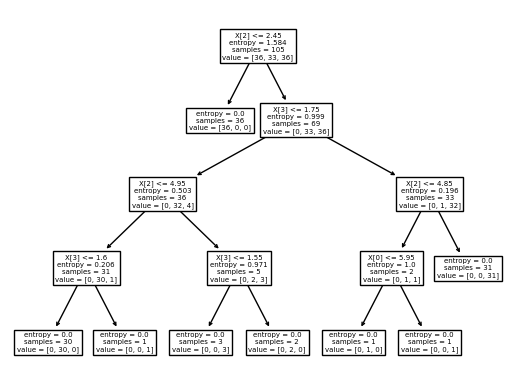

In [24]:
from sklearn import tree
tree.plot_tree(DT)